# Wavelength calibration

This notebook contains the instructions to process the laboratory data in order to obtain the wavelength calibration for a series.


## Step 1. Data reduction

It is possible to reduce only part of the data by selecting a list of numbers (of the GC, gas cells) names.

```
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26])
```

Otherwise, the entire reduction can be done in one shot.

In [1]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/'
reduceData(rootdir)


In GC 1 0  there are  134 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 2 0  there are  217 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 3 0  there are  251 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 4 0  there are  217 sw files
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........2

## Step 2. Check the coverage

Plot the central pixel of the central spaxel for the different combinations.

Solid line is dichroic 130, dashed line is dichroic 105.

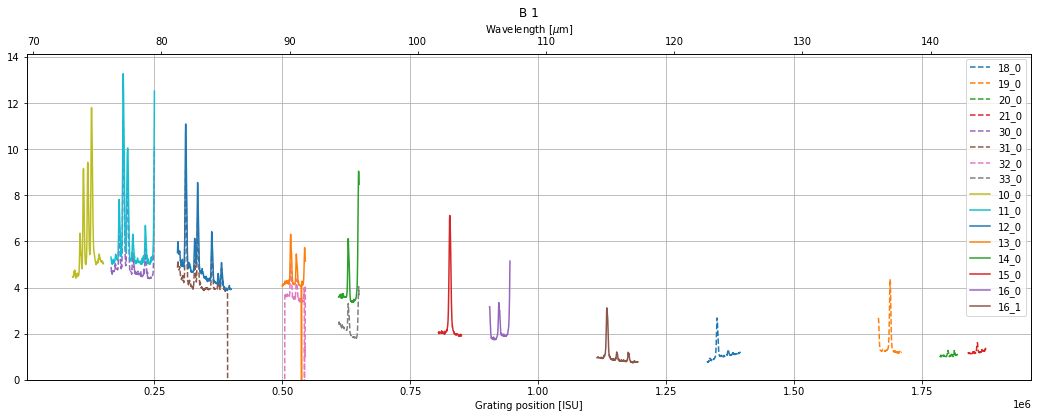

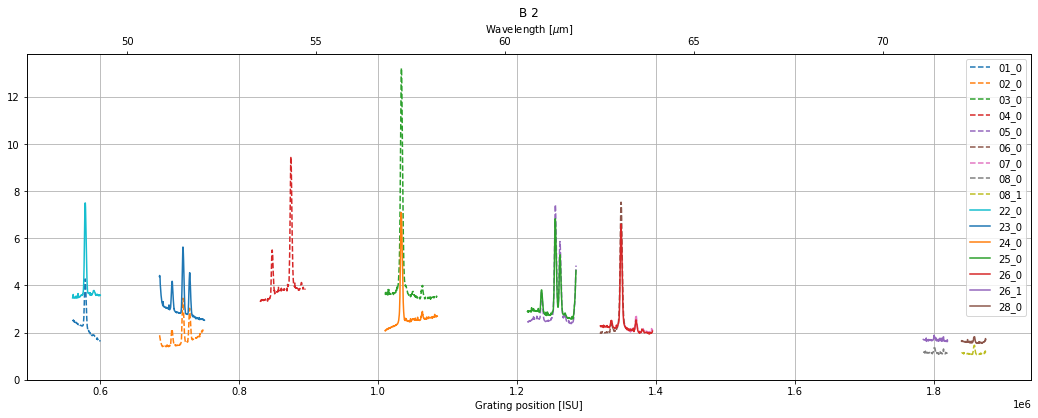

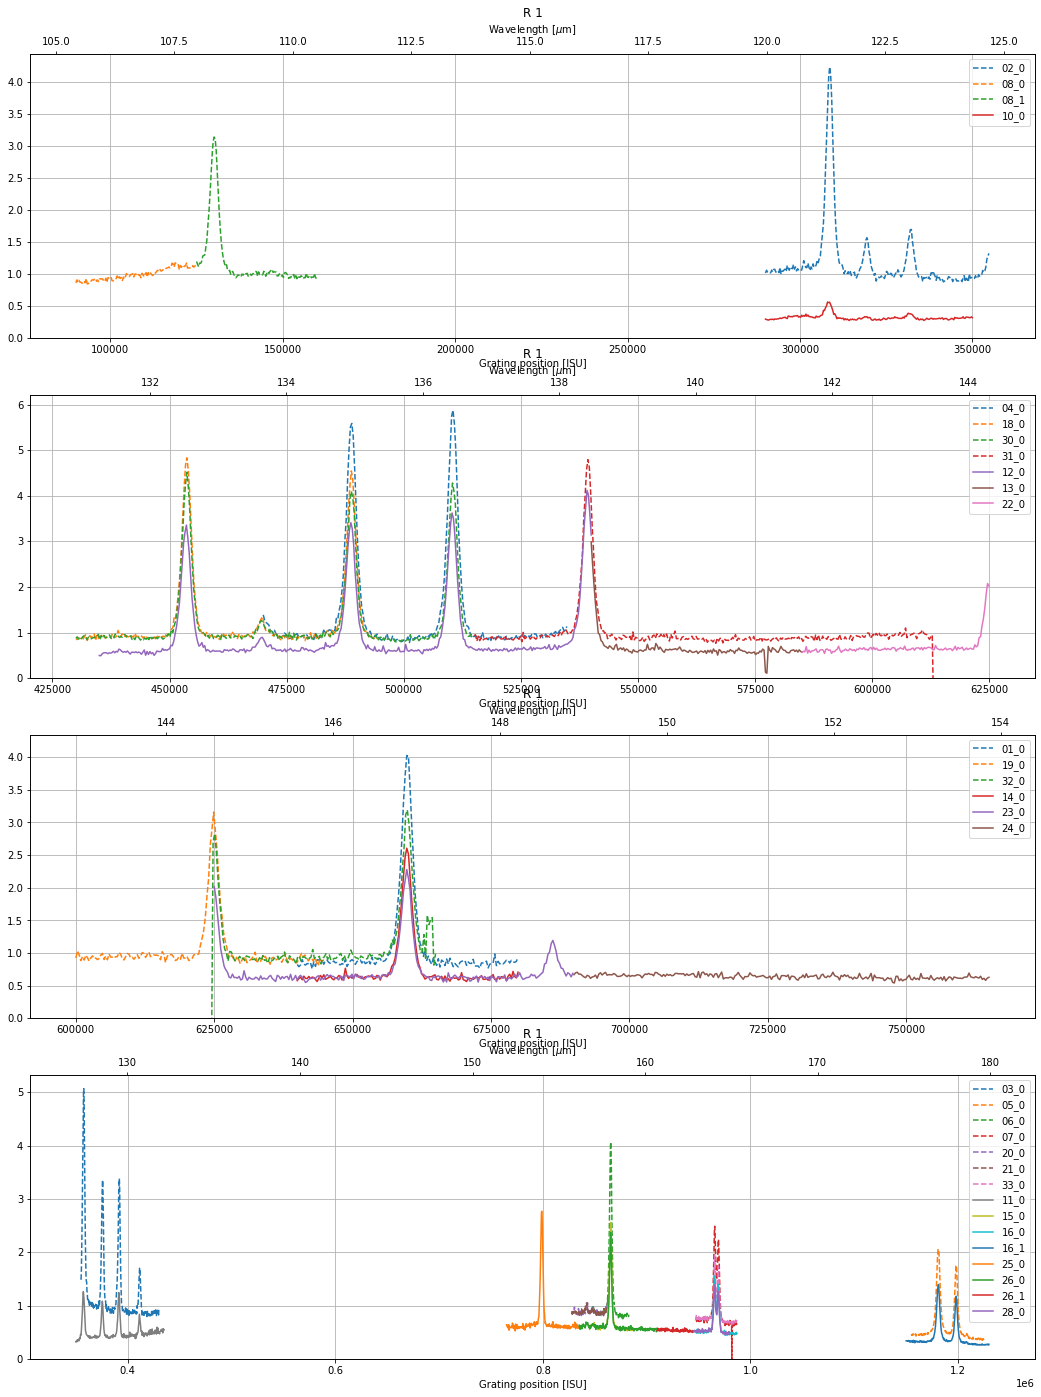

In [1]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 3. Merge files

In same cases an observation is done in two parts. These cases have to be merged before fitting the lines, otherwise the fitting is difficult and incorrect in some pixels.

In this case the blue seems OK.
The red has a few mergings:
- B    6_0 +  7_0 ->  6_1
- R    8_0 +  8_1 ->  8_2
- R   12_0 + 13_0 -> 12_1
- R   22_0 + 23_0 -> 22_1
- R   22_1 + 24_0 -> 22_2
- R    6_0 + 21_0 ->  6_1

In [4]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [5]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC08_1.fits'
outfile = rootdir + 'R1_105_GC08_2.fits'
mergeFiles(infile1, infile2, outfile)

In [6]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [7]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'R1_130_GC22_0.fits'
infile2 = rootdir + 'R1_130_GC23_0.fits'
outfile = rootdir + 'R1_130_GC22_1.fits'
mergeFiles(infile1, infile2, outfile)

In [8]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'R1_130_GC22_1.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC22_2.fits'
mergeFiles(infile1, infile2, outfile)

In [9]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile1 = rootdir + 'R1_105_GC06_0.fits'
infile2 = rootdir + 'R1_105_GC21_0.fits'
outfile = rootdir + 'R1_130_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

Move unused files away.

In [12]:
import os
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
os.mkdir(rootdir+'OLD')

files = [
    'B2_105_GC06_0.fits',
    'B2_105_GC07_0.fits',
    'R1_105_GC08_0.fits',
    'R1_105_GC08_1.fits',
    'R1_130_GC12_0.fits',
    'R1_130_GC13_0.fits',
    'R1_130_GC22_0.fits',
    'R1_130_GC23_0.fits',
    'R1_130_GC22_1.fits',
    'R1_130_GC24_0.fits',
    'R1_105_GC06_0.fits',
    'R1_105_GC21_0.fits',
    'B2_105_GC08_0.fits',
    'B2_105_GC08_1.fits',
    'B2_130_GC26_1.fits',
    'B2_130_GC28_0.fits',
    'B1_105_GC19_0.fits',
    'B1_105_GC20_0.fits',
    'B1_105_GC21_0.fits',
]


for file in files:
    os.rename(rootdir+file, rootdir + 'OLD/'+file)

Double check

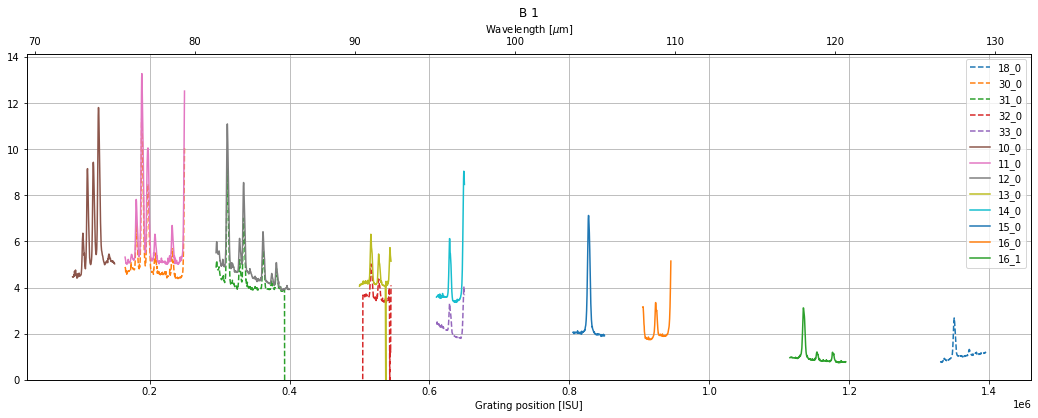

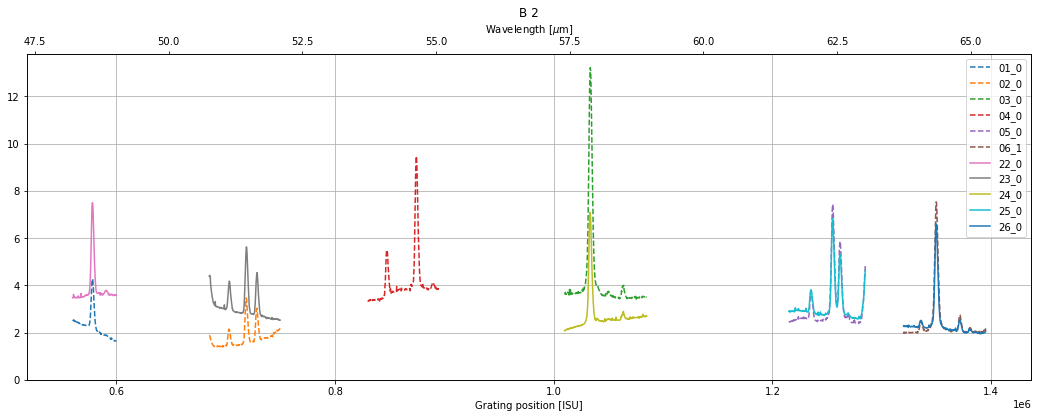

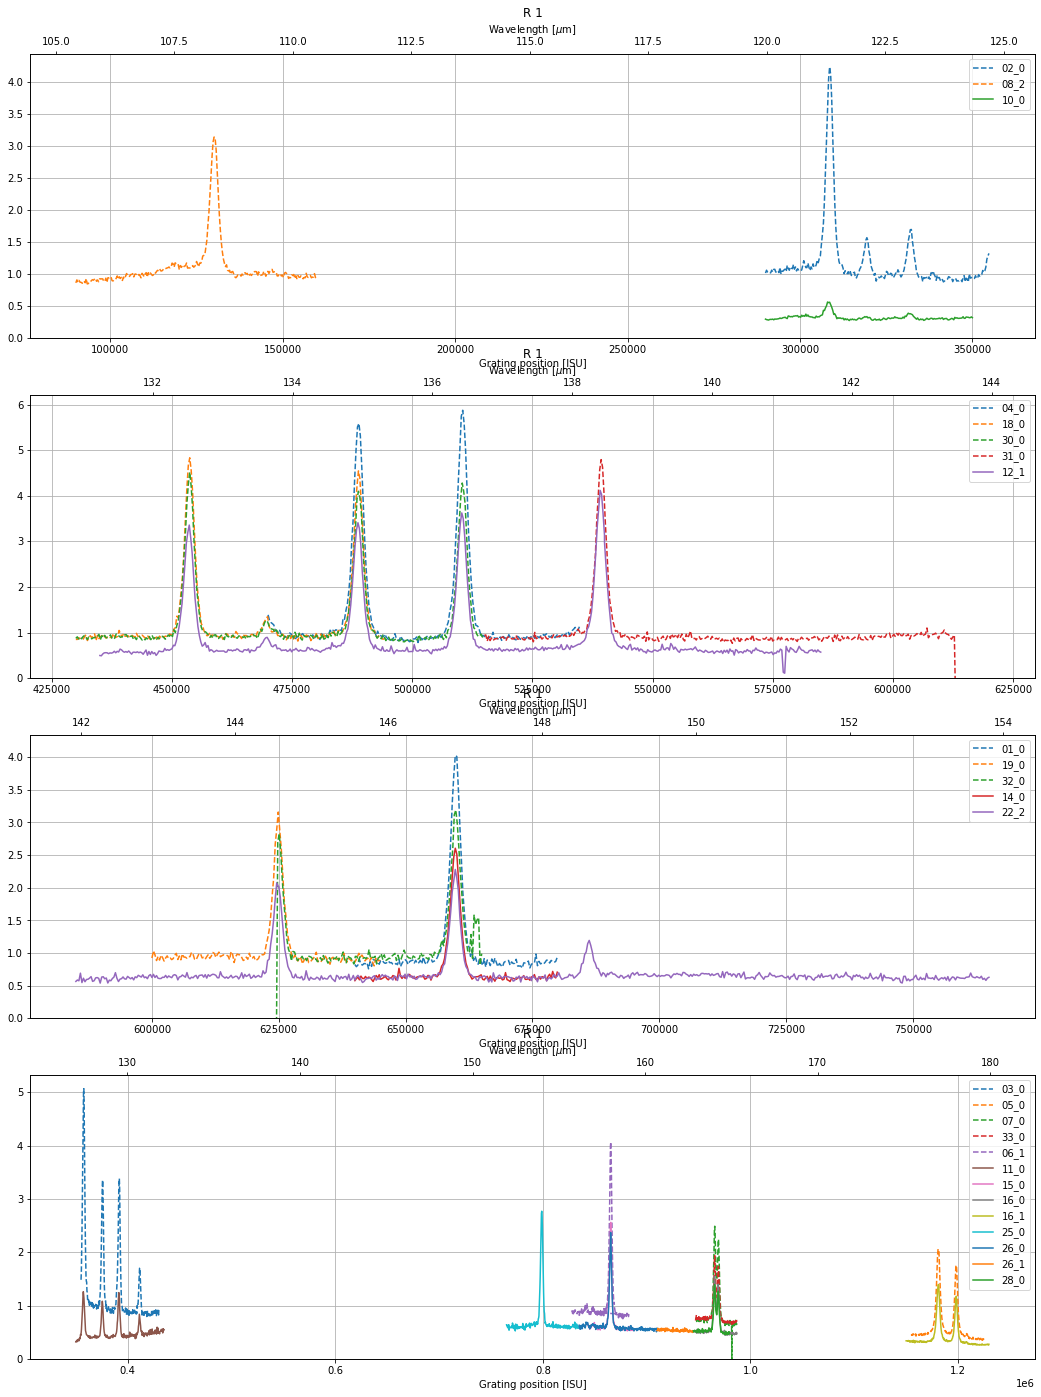

In [21]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)


## Step 4. Fit the cubes

It is possible to fit a single cube and show the results.

```
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)
```
Otherwise, the entire fitting can be done in one shot.
The results are conserved in pdf files with the same names which can be inspected to check the quality of the fits.

In [14]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

51 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B2_105_GC05_0.fits BLUE 2   ................
50 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B2_105_GC04_0.fits BLUE 2   ................
49 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/R1_130_GC26_0.fits RED 1   ................
48 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B1_105_GC18_0.fits BLUE 1   ................
47 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B1_105_GC33_0.fits BLUE 1   ................
46 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B2_105_GC01_0.fits BLUE 2   ................
45 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/R1_105_GC18_0.fits RED 1   ................
44 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B2_105_GC03_0.fits BLUE 2   ................
43 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/R1_130_GC14_0.fits RED 1   ................
42 /home/dario/FIFI-LS/Calibration/Wavelength/Reduced/B2_130_GC25_0.fits BLUE 2   ................
41 /home/dari

##  Step 5. Fit the parameters

For each case, run first the calibration with free parameters, then fix the parameters to the median of all parameters and get the best fit for g and ISOFF.

### R 105

In [1]:
# Select files
from fifipy.wavecal import selectFiles

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
channel = 'R'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

Number of files  13


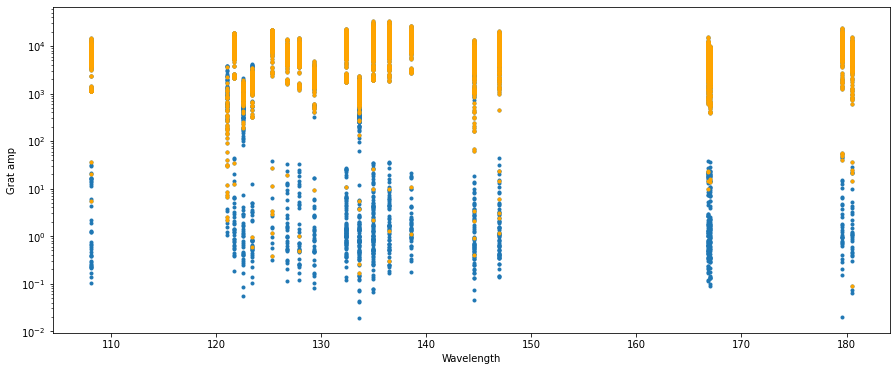

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

In [3]:
# Fit for single spaxels (gamma is fixed by default)
from fifipy.wavecal import computeWavCal
channel = 'R'
order = 1
idx = (gratamp > 100) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order
                    ,fixPS= 0.0005860571085734467
                    ,fixQS= 1.5457885849562502e-06
                    ,fixQOFF= 6.35575050021164
                   )

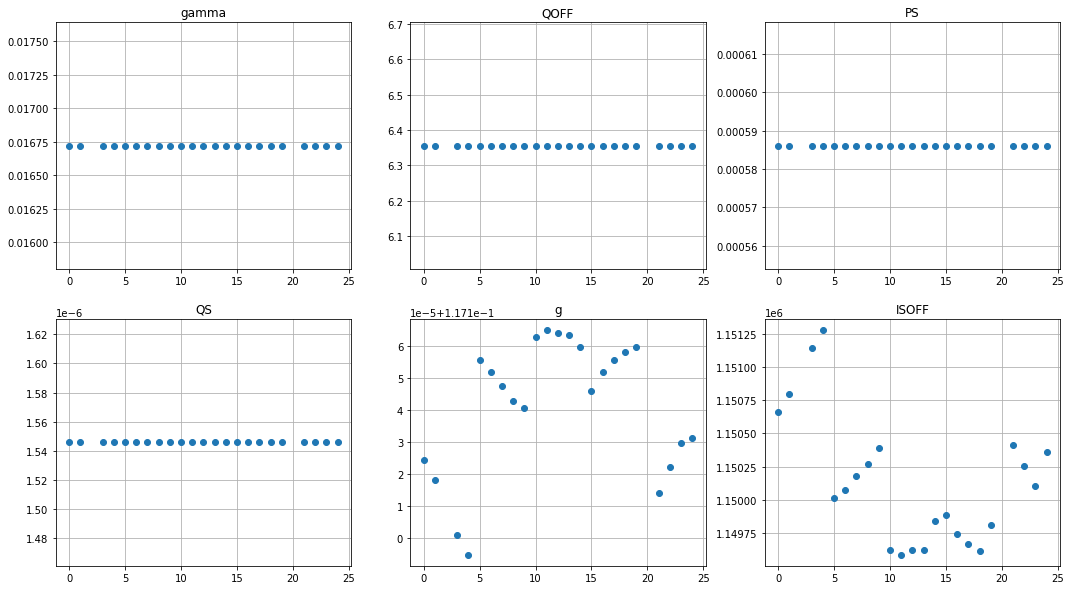

,fixPS= 0.0005860571085734467
,fixQS= 1.5457885849562502e-06
,fixQOFF= 6.35575050021164


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g,gamma,QOFF, PS,QS, ISOFF = out
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
rows = [0,0,0,1,1,1]
cols = [0,1,2,0,1,2]
for v, title,r,c in zip([gamma, QOFF, PS, QS, g, ISOFF],['gamma','QOFF', 'PS', 'QS','g','ISOFF'], rows, cols):
    ax[r,c].plot(v,'o')
    ax[r,c].set_title(title)
    ax[r,c].grid()
plt.show()
    
goodpixels = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18,20,21,22,23]

print(',fixPS=', np.nanmedian(PS[goodpixels]))
print(',fixQS=', np.nanmedian(QS[goodpixels]))
print(',fixQOFF=', np.nanmedian(QOFF[goodpixels]))
#print(',fixgamma=', np.nanmedian(gamma[goodpixels]))

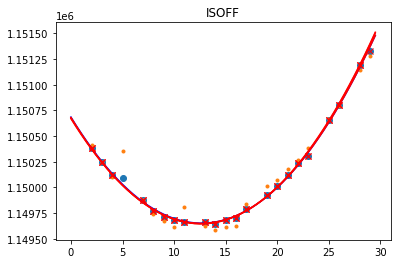

ai =  6.512935550395305
bi =  -163.9069987186168
ci =  1150678.8060338225


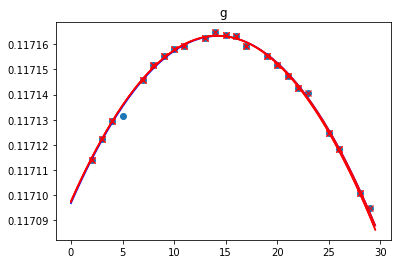

g0 =  0.1171633758330621
NP =  14.178326387392923
a  =  422.18076289588214


In [5]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)
g0,NP,a  = fitg(g)

Number of files  13


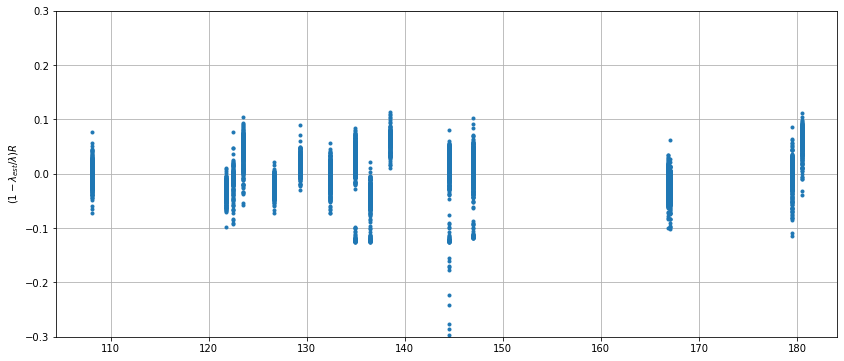

In [11]:
# Quality fit
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
PS= 0.0005860571085734467
QS= 1.5457885849562502e-06
QOFF= 6.35575050021164
g0 =  0.1171633758330621
NP =  14.178326387392923
a  =  422.18076289588214
ai =  6.512935550395305
bi =  -163.9069987186168
ci =  1150678.8060338225
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

### R 130

In [6]:
# Select files
from fifipy.wavecal import selectFiles

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
channel = 'R'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

Number of files  13


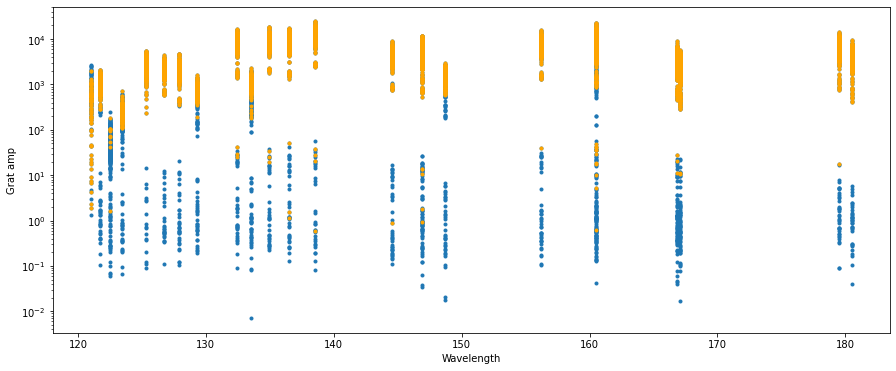

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

In [10]:
# Fit for single spaxels (gamma is fixed by default)
from fifipy.wavecal import computeWavCal
idx = (gratamp > 100) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order
                    ,fixPS= 0.0005862310900975839
                    ,fixQS= 1.3313419300753522e-06
                    ,fixQOFF= 5.9938919760772436
                    )

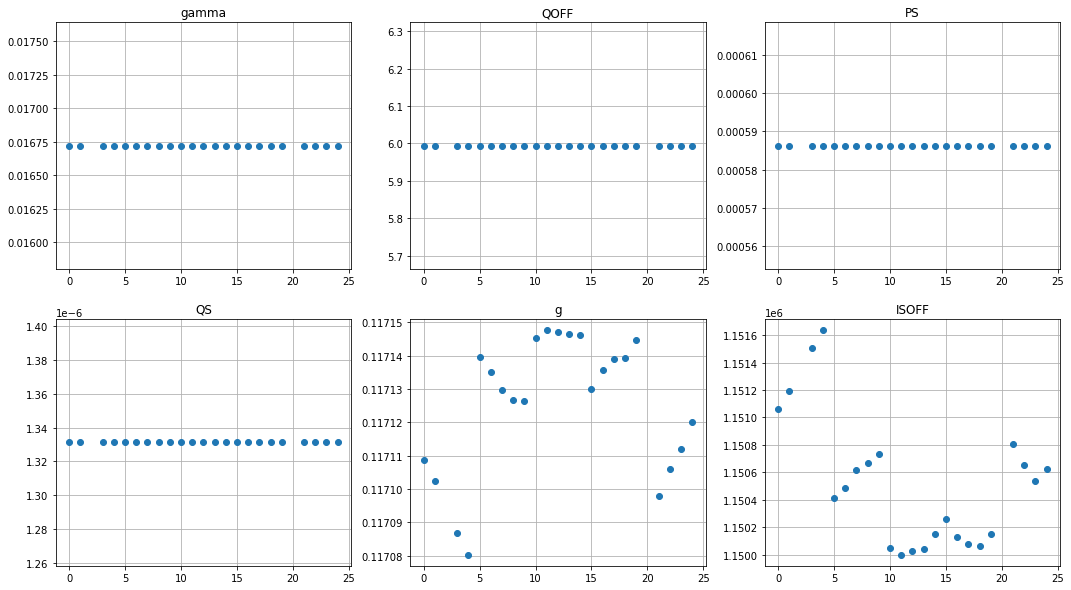

,fixPS= 0.0005862310900975839
,fixQS= 1.3313419300753522e-06
,fixQOFF= 5.9938919760772436


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g,gamma,QOFF, PS,QS, ISOFF = out
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
rows = [0,0,0,1,1,1]
cols = [0,1,2,0,1,2]
for v, title,r,c in zip([gamma, QOFF, PS, QS, g, ISOFF],['gamma','QOFF', 'PS', 'QS','g','ISOFF'], rows, cols):
    ax[r,c].plot(v,'o')
    ax[r,c].set_title(title)
    ax[r,c].grid()
plt.show()
    
goodpixels = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18,20,21,22,23]

print(',fixPS=', np.nanmedian(PS[goodpixels]))
print(',fixQS=', np.nanmedian(QS[goodpixels]))
print(',fixQOFF=', np.nanmedian(QOFF[goodpixels]))

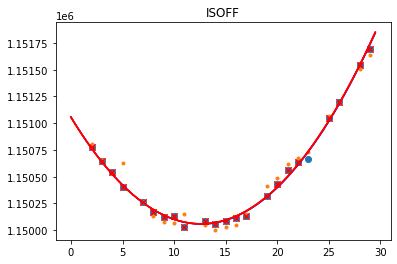

ai =  6.272615053064202
bi =  -158.09417559774786
ci =  1151055.6130255344


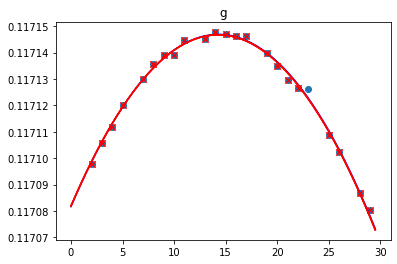

g0 =  0.11714673987584129
NP =  14.270488265644591
a  =  428.7258347154288


In [12]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)
g0,NP,a  = fitg(g)

Number of files  13


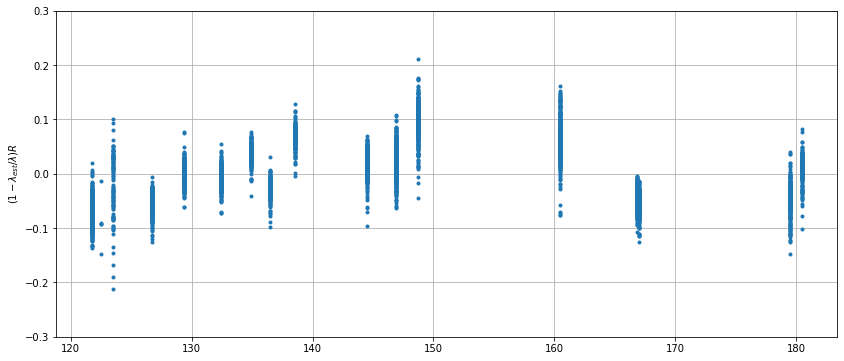

In [10]:
# Quality fit
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
PS= 0.0005862310900975839
QS= 1.3313419300753522e-06
QOFF= 5.9938919760772436
g0 =  0.11714673987584129
NP =  14.270488265644591
a  =  428.7258347154288
ai =  6.272615053064202
bi =  -158.09417559774786
ci =  1151055.6130255344
plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

### B 1

In [64]:
# Select files
from fifipy.wavecal import selectFiles

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
channel = 'B'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

Number of files  11


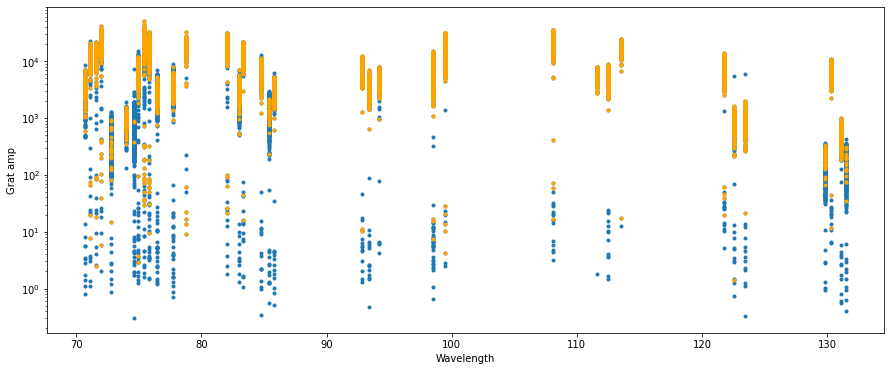

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 150) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

In [68]:
# Fit for single spaxels (gamma is fixed by default)
from fifipy.wavecal import computeWavCal
idx = (gratamp > 200) & (gerrpos < 100) & (waveok == 1) 
channel = 'B'
order = 1
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order
                    ,fixPS= 0.0005549728852255376
                    ,fixQS= 1.0438120278883657e-05
                    ,fixQOFF= 6.843086660020776
                   )

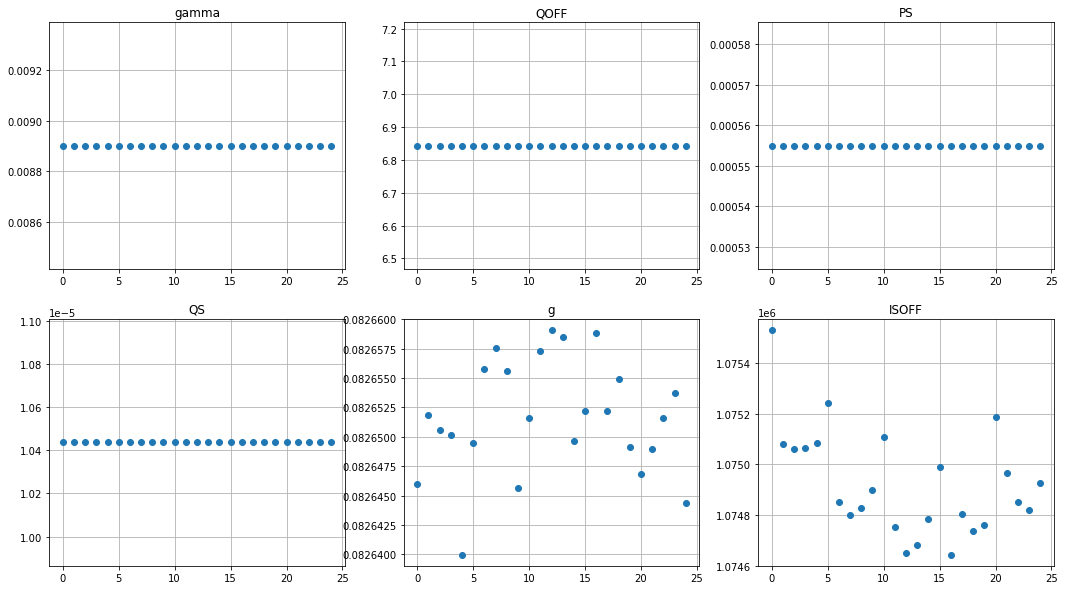

,fixPS= 0.0005549728852255376
,fixQS= 1.0438120278883657e-05
,fixQOFF= 6.843086660020776


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g,gamma,QOFF, PS,QS, ISOFF = out
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
rows = [0,0,0,1,1,1]
cols = [0,1,2,0,1,2]
for v, title,r,c in zip([gamma, QOFF, PS, QS, g, ISOFF],['gamma','QOFF', 'PS', 'QS','g','ISOFF'], rows, cols):
    ax[r,c].plot(v,'o')
    ax[r,c].set_title(title)
    ax[r,c].grid()
plt.show()
    
goodpixels = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18,20,21,22,23]

print(',fixPS=', np.nanmedian(PS[goodpixels]))
print(',fixQS=', np.nanmedian(QS[goodpixels]))
print(',fixQOFF=', np.nanmedian(QOFF[goodpixels]))

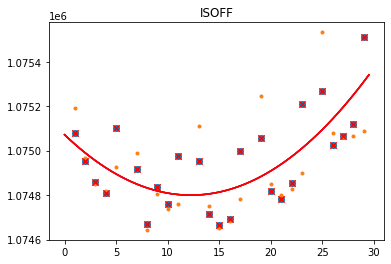

ai =  1.8155249629905699
bi =  -44.43814753578198
ci =  1075071.754178313


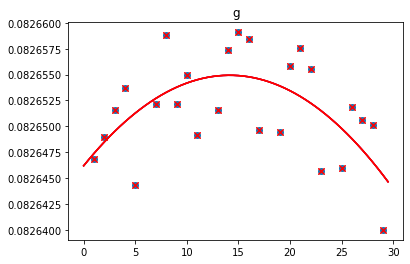

g0 =  0.08265493376033396
NP =  14.150875805279227
a  =  972.7376700248841


In [70]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)
g0,NP,a  = fitg(g)

Number of files  11


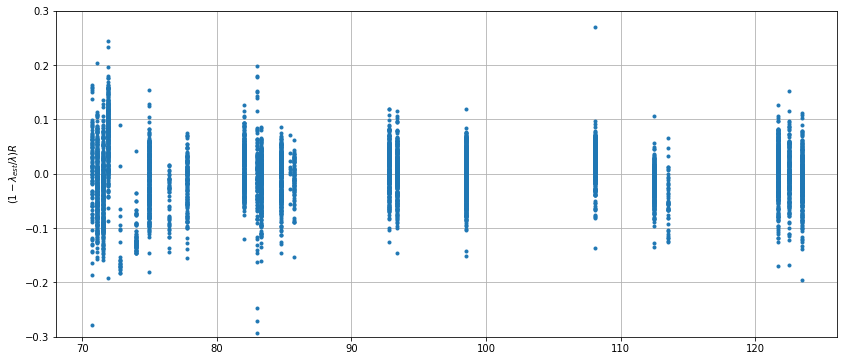

In [1]:
# Quality fit
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
PS= 0.0005549728852255376
QS= 1.0438120278883657e-05
QOFF= 6.843086660020776
g0 =  0.08265493376033396
NP =  14.150875805279227
a  =  972.7376700248841
ai =  1.8155249629905699
bi =  -44.43814753578198
ci =  1075071.754178313
plotQualityFit(rootdir, 'B1', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

### B 2

In [2]:
# Select files
from fifipy.wavecal import selectFiles

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
channel = 'B'
order = '2'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

Number of files  11


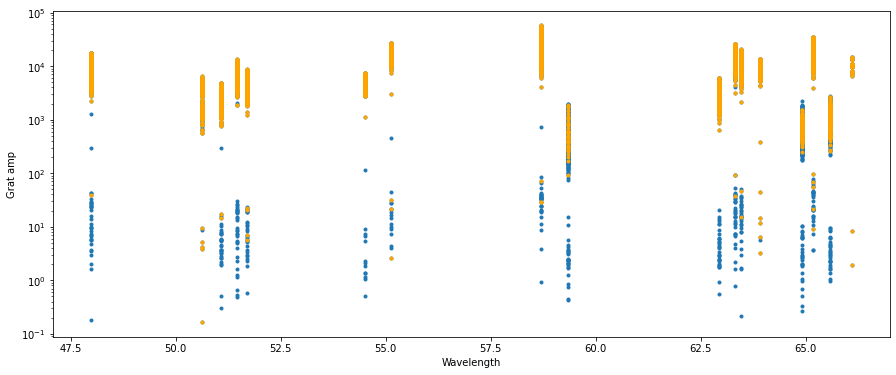

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

In [6]:
# Fit for single spaxels (gamma is fixed by default)
from fifipy.wavecal import computeWavCal
idx = (gratamp > 100) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], 'B',2
                    ,fixPS= 0.000562316311214935
                    ,fixQS= 6.7983898770077804e-06
                    ,fixQOFF= 6.335130160299338
)

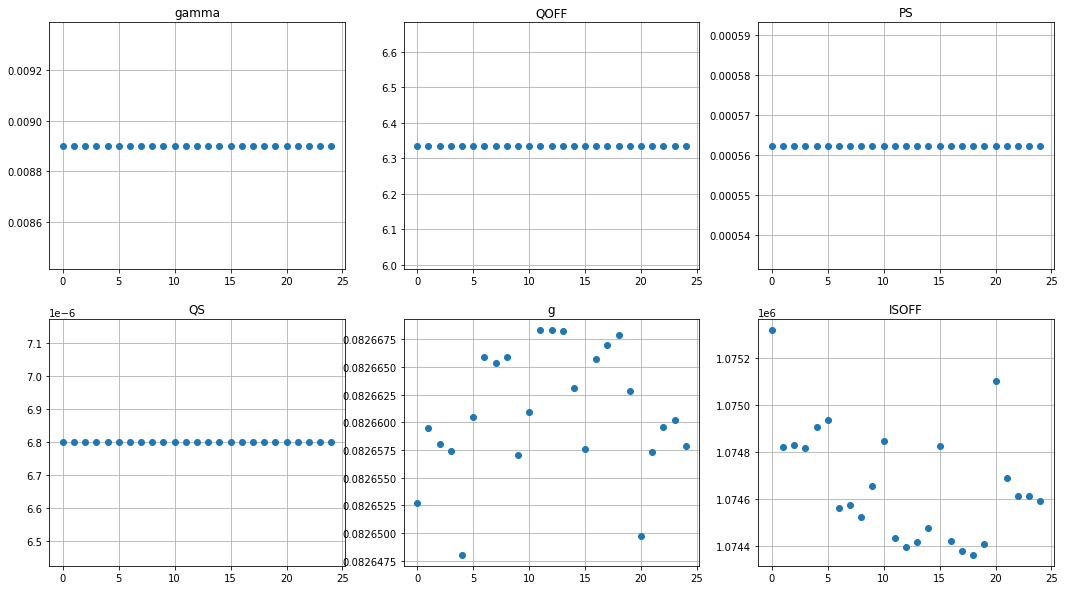

,fixPS= 0.000562316311214935
,fixQS= 6.7983898770077804e-06
,fixQOFF= 6.335130160299338


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
g,gamma,QOFF, PS,QS, ISOFF = out
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
rows = [0,0,0,1,1,1]
cols = [0,1,2,0,1,2]
for v, title,r,c in zip([gamma, QOFF, PS, QS, g, ISOFF],['gamma','QOFF', 'PS', 'QS','g','ISOFF'], rows, cols):
    ax[r,c].plot(v,'o')
    ax[r,c].set_title(title)
    ax[r,c].grid()
plt.show()
    
goodpixels = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18,20,21,22,23]

print(',fixPS=', np.nanmedian(PS[goodpixels]))
print(',fixQS=', np.nanmedian(QS[goodpixels]))
print(',fixQOFF=', np.nanmedian(QOFF[goodpixels]))

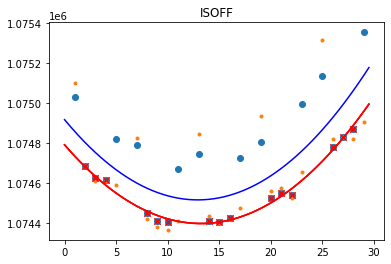

ai =  2.2586469001932414
bi =  -59.71750637946218
ci =  1074790.6464473614


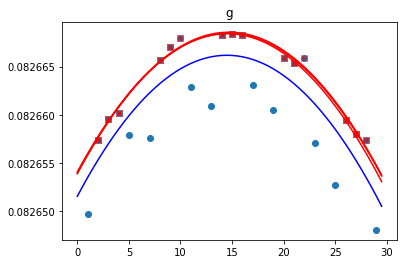

g0 =  0.08266840020695011
NP =  14.548169577705119
a  =  776.0576930298644


In [8]:
# Fit of g and ISOFF
from fifipy.wavecal import fitISOFF,fitg
ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)
g0,NP,a  = fitg(g)

Number of files  11


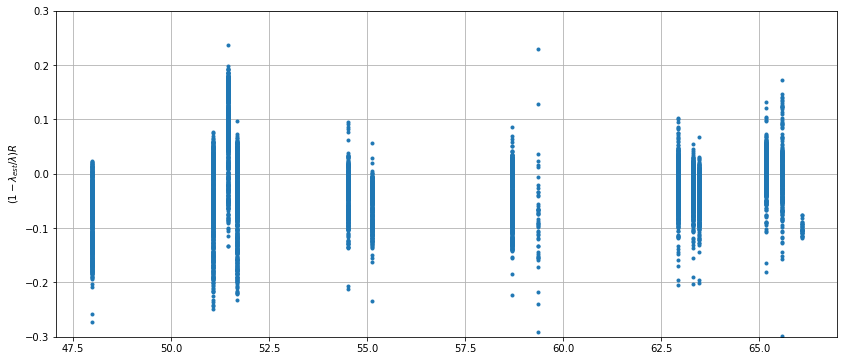

In [9]:
# Quality fit
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
PS= 0.000562316311214935
QS= 6.7983898770077804e-06
QOFF= 6.335130160299338
g0 =  0.08266840020695011
NP =  14.548169577705119
a  =  776.0576930298644
ai =  2.2586469001932414
bi =  -59.71750637946218
ci =  1074790.6464473614
plotQualityFit(rootdir, 'B2', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

Test

In [31]:
from astropy.io import fits
rootdir = '/home/dario/FIFI-LS/Calibration/Wavelength/Reduced/'
infile = rootdir + 'R1_105_GC01_0.fits'

with fits.open(infile) as hdl:
    g = hdl['Grating Position'].data
    w = hdl['WAVE'].data
    dw = hdl['DWAVE'].data
    specs = hdl['SPECS'].data
    header = hdl[0].header
    detchan = header['CHANNEL']
    order = header['ORDER']
    dichroic = header['DICHROIC']
    obsdate = header['OBSDATE']


# Table with lines
import pandas as pd

print('channel, order ', detchan, order)

path = '/home/dario/Python/Fifilab/'
lines = pd.read_csv(path+'water'+detchan+str(order)+'.csv', delimiter=',',header=0,
                    names=['wave','fwhm_air','fwhm_h2o','ok','fwhm_isu'])

channel, order  RED 1


[146.9227 148.7078]


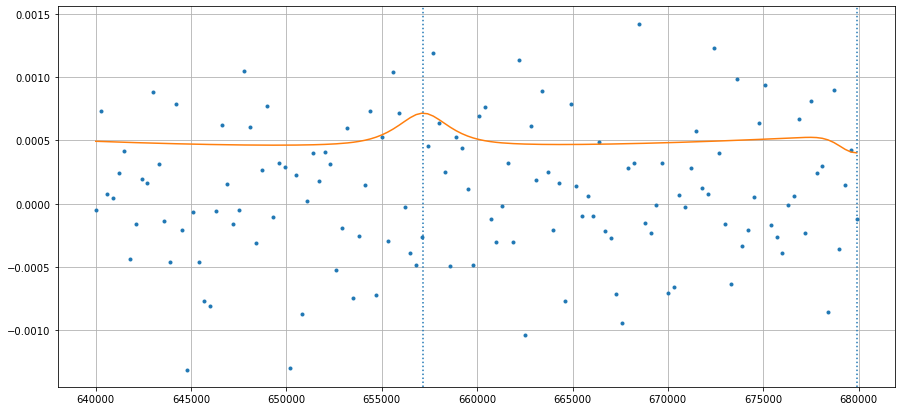

[320.1620990634692, 0]


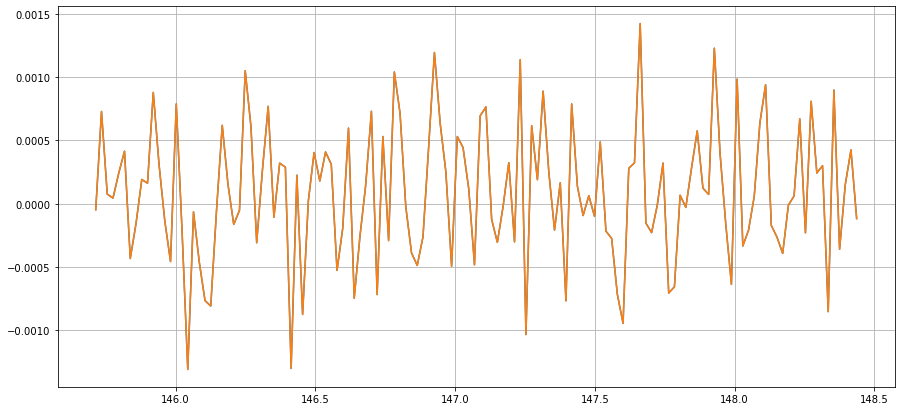

In [35]:
from fifipy.wavecal import fitLines, wlimits
%matplotlib inline
import matplotlib.pyplot as plt

# Pixel      
i = 10 # spectral pixel
j = 2 # spatial pixel
# Range of wavelengths
wcommon, wrange = wlimits(w, i)
wlines = lines.wave.values
fwhms  = lines.fwhm_isu.values
idx =  (wrange[0]-0.5 < wlines) & (wlines < wrange[1]+0.5)
print(wlines[idx])
jout, centers, errors, amplitudes, fwhms, fractions, bestfit = fitLines(wlines[idx], fwhms[idx], g, w, specs, i, j)

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(g, specs[:,i,jout],'.')
ax.plot(g, bestfit)
for c in centers:
    ax.axvline(c,linestyle=':')
ax.grid()
plt.show()

print(errors)

x = w[:,j,i]
y = specs[:,i,j]
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(x,y)
plt.plot(w[:,j,i], specs[:,i,j],label='spec')
plt.grid()
plt.show()